<b>Лабораторная работа</b>

<b>Часть 1</b>

Постановка задачи:<br/>
<b>Цель:</b> исследовать зависимость количества скачиваний программного продукта от количества посещений сайта.
Исходные данные: данные о посещениях сайта и количестве скачиваний программного продукта. Данные представлены в виде таблицы и графиков.

<b>Вопросы, на которые требуется ответить:</b>

При количестве посещений сайта в 8000 человек, сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт?
Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?<br/>
<b>Задачи:</b>

Вывести формулы для построения линейной регрессии (метод наименьших квадратов).
Реализовать функции для вычисления среднего значения, дисперсии, коэффициента корреляции.
Реализовать метод наименьших квадратов (используя только «самописные» функции).
Построить линейные графики: отображение исходных данных, диаграмма рассеяния, линейная регрессия.

<b>Описание алгоритма с основными формулами:</b>

Линейная регрессия:

Предположим, что у нас есть зависимая переменная y (количество скачиваний программного продукта) и независимая переменная x (количество посещений сайта). Мы хотим найти линейную зависимость между этими переменными, выраженную в виде уравнения: y = mx + b, где m - коэффициент наклона (slope), b - интерсепт (intercept).
Наша задача - найти такие значения m и b, чтобы линия, которую они задают, наилучшим образом соответствовала нашим данным.<br/>
Метод наименьших квадратов:

Мы хотим минимизировать сумму квадратов отклонений между фактическими значениями y и предсказанными значениями y нашей модели.
Функция потерь (loss function) для метода наименьших квадратов выглядит следующим образом: L = Σ(yi - (mx + b))^2, где Σ - сумма по всем наблюдениям, yi - фактическое значение y, mx + b - предсказанное значение y.
Наша задача - найти такие значения m и b, которые минимизируют функцию потерь.
Вычисление коэффициентов:

Для нахождения коэффициентов m и b мы можем использовать формулы:
a = Σ((xi - x_mean) * (yi - y_mean)) / Σ((xi - x_mean)^2)
b = y_mean - a * x_mean
Где x_mean и y_mean - это средние значения x и y, xi и yi - фактические значения x и y.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
df = pd.read_csv("C:\\Users\\1642579\\Downloads\\website_stat.csv")
df[['site_views', 'site_regs']]

,site_views,site_regs
0,5252,21
1,7620,46
2,941,9
3,1159,8
4,485,3
5,299,6
6,239,4
7,195,2
8,181,2
9,180,2


Коэффициент корреляции - 0.9694433977097229


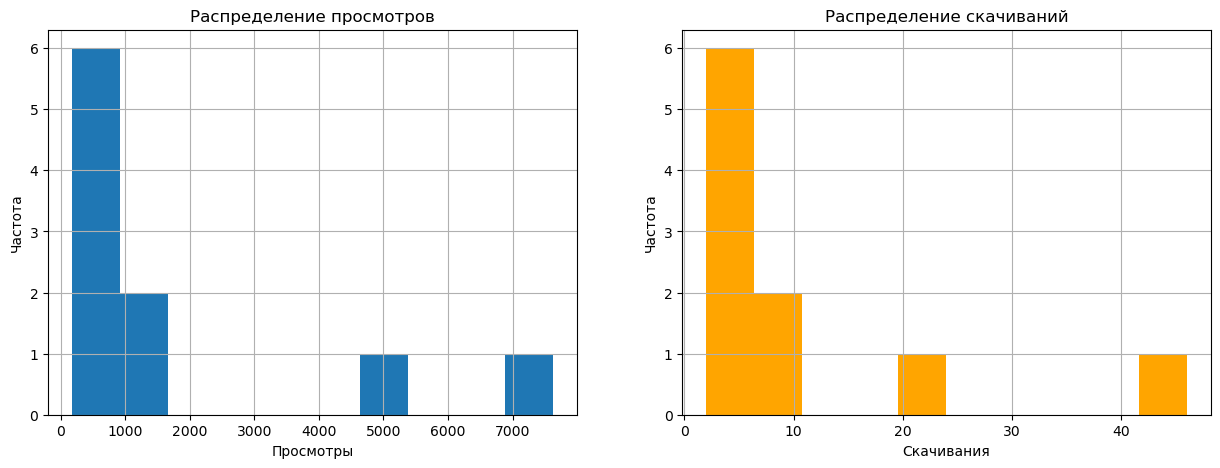

In [3]:
# вычисляет среднее значение для массива x
def M(x, df):
    N = df.shape[0]
    sum = 0
    for i in range(N):
        sum += x[i]
    return sum/N
# вычисляет дисперсию для массива x
def D(x, mx, df):
    N = df.shape[0]
    sum = 0
    for i in range(N):
        sum += (x[i] - mx)**2
    return sum/N
# вычисляет сумму квадратов для массива x
def M_2(x, df):
    N = df.shape[0]
    sum = 0
    for i in range(N):
        sum += x[i]**2
    return sum
# вычисляет ковариацию для массивов x и z
def XZ(x, z, df):
    N = df.shape[0]
    sum = 0
    for i in range(N):
        sum += x[i] * z[i]
    return sum/N

def corr_coef(x, z, mx, mz, dx, dz, df):
    N = df.shape[0]
    sum = 0
    for i in range(N):
        sum += (x[i] - mx) * (z[i] - mz)
    return 1/N * (sum / (dx * dz)**(1/2))


N = df.shape[0]
mx = M(df.site_views, df)
mx_2 = M_2(df.site_views, df)
mz = M(df.site_regs, df)
dx = D(df.site_views, mx, df)
dz = D(df.site_regs, mz, df)
xz = XZ(df.site_views, df.site_regs, df)
corr_old = corr_coef(df.site_views, df.site_regs, mx, mz, dx, dz, df)
print(f"Коэффициент корреляции - {corr_old}")
f, ax = plt.subplots(1,2, figsize=(15,5))
df.site_views.hist(ax=ax[0])

ax[0].set_title('Распределение просмотров')
ax[0].set_ylabel('Частота')
ax[0].set_xlabel('Просмотры')

df.site_regs.hist(ax=ax[1], color='orange')
ax[1].set_title('Распределение скачиваний')
ax[1].set_ylabel('Частота')
ax[1].set_xlabel('Скачивания')
plt.show()


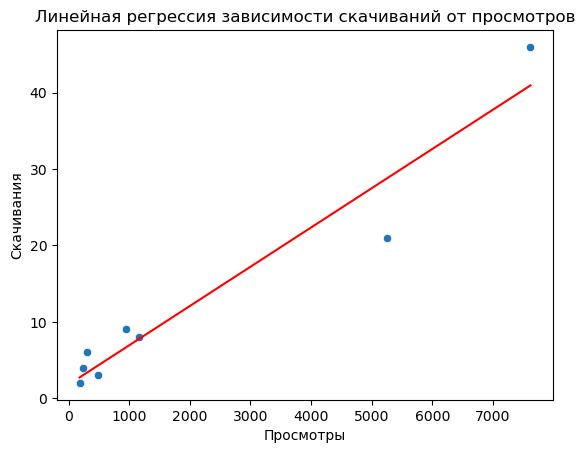

In [4]:
# Вычисление коэффициентов линейной регрессии
A = ((mx * mz - xz) / (mx**2 - mx_2/N))
B = mz - (A*mx)

sns.scatterplot(df, x='site_views', y='site_regs')
f = []
for x in df.site_views:
    f.append(A*x+B) #добавляет предсказанное значение y (Ax+B) в список f
sns.lineplot(x=df.site_views, y=f, c='red')
plt.title("Линейная регрессия зависимости скачиваний от просмотров")
plt.ylabel("Скачивания")
plt.xlabel("Просмотры")
plt.show()

In [5]:
# Предсказание количества скачиваний продукта при заданном количестве посещений сайта
y = A * 8000 + B
print(f"При 8000 посещениях сайта планируется получить {math.floor(y)} зарегистрированных пользователей")

При 8000 посещениях сайта планируется получить 42 зарегистрированных пользователей


In [6]:
# Предсказание количества посещений сайта, которое необходимо для достижения 500 скачиваний продукта
x = (500 - B) / A
print(f"Для обеспечения 500 скачиваний продукта, на сайт должно зайти около {math.floor(x)} человек")

Для обеспечения 500 скачиваний продукта, на сайт должно зайти около 96921 человек


<div style='text-align:center'><b>Часть 2</b></div>

In [7]:
df = pd.read_csv("C:\\Users\\1642579\\Downloads\\website_stat.csv")
df

,day,site_views,site_regs
0,5,5252,21
1,6,7620,46
2,7,941,9
3,8,1159,8
4,9,485,3
5,10,299,6
6,11,239,4
7,12,195,2
8,13,181,2
9,14,180,2


In [8]:
df.describe()

,day,site_views,site_regs
count,10.00000,10.000000,10.000000
mean,9.50000,1655.100000,10.300000
std,3.02765,2602.734436,13.800564
min,5.00000,180.000000,2.000000
25%,7.25000,206.000000,2.250000
50%,9.50000,392.000000,5.000000
75%,11.75000,1104.500000,8.750000
max,14.00000,7620.000000,46.000000


In [9]:
# Вычисляет различные статистические параметры для двух массивов данных: df.site_views и df.site_regs
mean_views = np.mean(df.site_views)
mean_regs = np.mean(df.site_regs)
var_views = np.var(df.site_views)
std_views = np.std(df.site_views)
var_regs = np.var(df.site_regs)
std_regs = np.std(df.site_regs)
max_views = df.site_views.max()
min_views = df.site_views.min()
max_regs = df.site_regs.max()
min_regs = df.site_regs.min()
corr_new = np.corrcoef(df.site_views, df.site_regs)[0][0]
# Старые и новые показатели
print(f"mean_views: | old \ new | {mean_views, mx}")
print(f"mean_regs:  | old \ new | {mean_regs, mz}")
print(f"var_views:  | old \ new | {var_views, dx}")
print(f"std_views:  | old \ new | {std_views}")
print(f"var_regs:   | old \ new | {var_regs, dz}")
print(f"std_regs:   | old \ new | {std_regs}")
print(f"max_views:  | old \ new | {max_views}")
print(f"min_views:  | old \ new | {min_views}")
print(f"max_regs:   | old \ new | {max_regs}")
print(f"min_regs:   | old \ new | {min_regs}")
print(f"corr_coef:  | old \ new | {corr_old, corr_new}")


mean_views: | old \ new | (1655.1, 1655.1)
mean_regs:  | old \ new | (10.3, 10.3)
var_views:  | old \ new | (6096803.89, 6096803.89)
std_views:  | old \ new | 2469.1706887131154
var_regs:   | old \ new | (171.41000000000005, 171.41000000000005)
std_regs:   | old \ new | 13.092364186807517
max_views:  | old \ new | 7620
min_views:  | old \ new | 180
max_regs:   | old \ new | 46
min_regs:   | old \ new | 2
corr_coef:  | old \ new | (0.9694433977097229, 0.9999999999999998)


Значения, полученные при использовании функций, написанных самостоятельно не отличаются от значений от методов numpy

Text(0.5, 0, 'Просмотры')

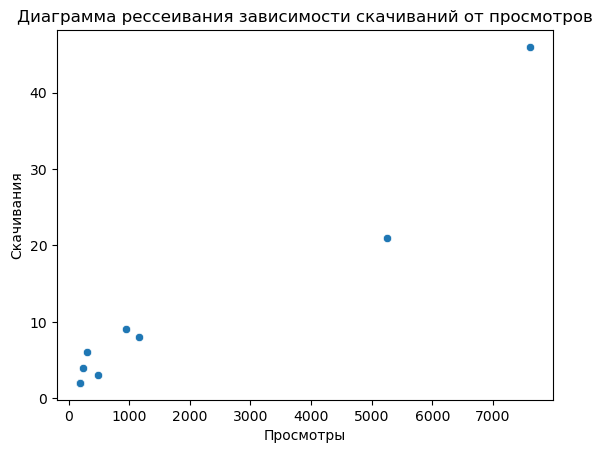

In [10]:
sns.scatterplot(df, x='site_views', y='site_regs')
plt.title("Диаграмма рессеивания зависимости скачиваний от просмотров")
plt.ylabel("Скачивания")
plt.xlabel("Просмотры")

In [11]:
from sklearn import linear_model
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

Text(0.5, 0, 'Просмотры')

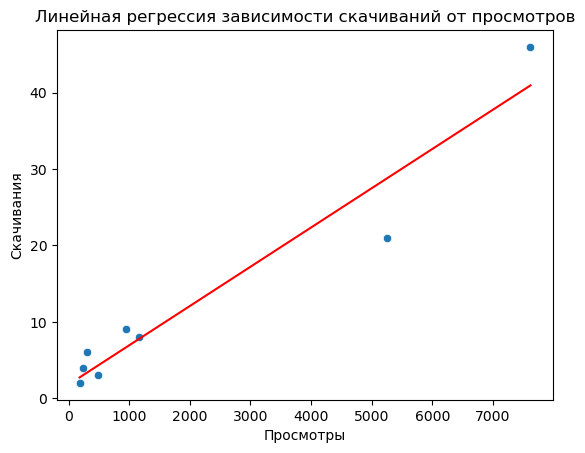

In [12]:
# Создание экземпляра линейной регрессии
reg = linear_model.LinearRegression()

x_train = df.site_views.to_numpy().reshape(-1, 1)
y_train = df.site_regs.to_numpy().reshape(-1, 1)

# Обучение модели линейной регрессии reg на обучающих данных 
reg.fit(x_train, y_train)

# Предсказание значений y_pred на основе обученной модели
y_pred = reg.predict(x_train)


sns.scatterplot(df, x='site_views', y='site_regs')
sns.lineplot(x=x_train.flatten(), y=y_pred.flatten(), c='red')

plt.title("Линейная регрессия зависимости скачиваний от просмотров")
plt.ylabel('Скачивания')
plt.xlabel("Просмотры")

In [13]:
# Вывод коэффициентов построенной линии регрессии
print(f"Новый A = {reg.coef_}, Старый A = {A}")
print(f"Новый B = {reg.intercept_}, Старый B = {B}")

Новый A = [[0.00514031]], Старый A = 0.005140311311538676
Новый B = [1.79227075], Старый B = 1.7922707482723386


Полученные значения коэффициентов линии регрессии практически не отличаются от написанных самостоятельно

In [14]:
# Вычисляет различные метрики качества модели линейной регрессии

# Вычисляет коэффициент детерминации (R^2),
# который измеряет, насколько хорошо модель соответствует данным. 
# Значение R^2 находится в диапазоне от 0 до 1, где 1 означает идеальное соответствие
print(f"𝑅2 Коэффициент детерминации - {reg.score(x_train, y_train)}")

# Вычисляет максимальную остаточную ошибку,
# которая представляет собой наибольшее абсолютное значение разницы между фактическими и предсказанными значениями
print(f"Максимальная остаточная ошибка - {max_error(x_train, y_pred)}")

# Вычисляет среднеквадратичную ошибку, 
# которая представляет собой среднее значение квадратов разницы между фактическими и предсказанными значениями
print(f"Cредняя квадратическая ошибка - {mean_squared_error(y_train, y_pred)}")

# Вычисляет медианную абсолютную ошибку,
# которая представляет собой медианное значение абсолютных разниц между фактическими и предсказанными значениями
print(f"Медианная абсолютная ошибка - {median_absolute_error(y_train, y_pred)}")

# Вычисляет среднюю абсолютную процентную ошибку,
# которая представляет собой среднее значение абсолютных процентных разниц между фактическими и предсказанными значениями
print(f"Средняя абсолютная процентная ошибка - {mean_absolute_percentage_error(y_train, y_pred)}")

𝑅2 Коэффициент детерминации - 0.9398205013629718
Максимальная остаточная ошибка - 7579.038557057803
Cредняя квадратическая ошибка - 10.315367861373016
Медианная абсолютная ошибка - 1.1322582913192574
Средняя абсолютная процентная ошибка - 0.30109030313845364


<b>Вывод</b>
* Коэффициент детерминации (R^2) составляет 0.9398. Это означает, что 93.98% дисперсии зависимой переменной (количество зарегистрированных пользователей) объясняется независимой переменной (количество посещений сайта). Таким образом, модель хорошо соответствует данным.

* Максимальная остаточная ошибка составляет 7579.04. Это означает, что наибольшая разница между фактическими и предсказанными значениями составляет 7579.04.

* Среднеквадратичная ошибка (MSE) составляет 10.32. Это означает, что средняя квадратичная разница между фактическими и предсказанными значениями составляет 10.32.

* Медианная абсолютная ошибка (MedAE) составляет 1.13. Это означает, что медианная абсолютная разница между фактическими и предсказанными значениями составляет 1.13.

* Средняя абсолютная процентная ошибка (MAPE) составляет 0.301. Это означает, что средняя абсолютная процентная разница между фактическими и предсказанными значениями составляет 0.301%.

Исходя из этих метрик, можно сделать вывод, что модель линейной регрессии хорошо соответствует данным и имеет низкие ошибки прогнозирования.

In [15]:
# Вычисляет предсказанное количество зарегистрированных пользователей при заданном количестве посещений сайта (8000)
result = reg.predict([[8000]])
result = result.flatten().tolist()[0]
print(f"При 8000 посещениях сайта планируется получить {math.floor(result)} зарегистрированных пользователей")

При 8000 посещениях сайта планируется получить 42 зарегистрированных пользователей


In [16]:
 # Преобразуем число 500 в двумерный массив
x_pred = ((500 - reg.intercept_) / reg.coef_).flatten().tolist()[0]

print(f"Для обеспечения 500 скачиваний продукта, на сайт должно зайти около {math.floor(x_pred)} человек")

Для обеспечения 500 скачиваний продукта, на сайт должно зайти около 96921 человек


<b>Список литературы</b>
* Линейная регрессия: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* Введение в машинное обучение с помощью Python" от O'Reilly: https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/
* Python for Data Analysis" от Wes McKinney: https://www.oreilly.com/library/view/python-for-data/9781491957653/
* SciPy and NumPy" от Eli Bressert: https://www.packtpub.com/product/scipy-and-numpy/9781849515991
* Data Science Handbook" от Jake VanderPlas: https://jakevdp.github.io/PythonDataScienceHandbook/
* Seaborn: Statistical Data Visualization" от Michael Waskom: https://seaborn.pydata.org/